In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

# **EXPLORATORY DATA ANALYSIS AND DATA CLEANING**

In [ ]:
len(df)

748725

In [ ]:
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,NaN,07-12-2023 15:05,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,NaN,07-12-2023 17:50,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,NaN,07-12-2023 14:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,NaN,07-12-2023 07:05,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,NaN,07-12-2023 18:30,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4329
CRASH_DATE_EST_I                 692200
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         549721
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       21327
CRASH_TYPE                            0
INTERSECTION_RELATED_I           577119
NOT_RIGHT_OF_WAY_I               713860
HIT_AND_RUN_I                    515174
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748725 entries, 0 to 748724
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                748725 non-null  object 
 1   RD_NO                          744396 non-null  object 
 2   CRASH_DATE_EST_I               56525 non-null   object 
 3   CRASH_DATE                     748725 non-null  object 
 4   POSTED_SPEED_LIMIT             748725 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         748725 non-null  object 
 6   DEVICE_CONDITION               748725 non-null  object 
 7   WEATHER_CONDITION              748725 non-null  object 
 8   LIGHTING_CONDITION             748725 non-null  object 
 9   FIRST_CRASH_TYPE               748725 non-null  object 
 10  TRAFFICWAY_TYPE                748725 non-null  object 
 11  LANE_CNT                       199004 non-null  float64
 12  ALIGNMENT                     

In [ ]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,748725.000000,1.990040e+05,748725.000000,748720.000000,748725.000000,747104.000000,747104.000000,747104.000000,747104.000000,747104.000000,747104.000000,747104.0,748725.000000,748725.000000,748725.000000,743799.000000,743799.000000
mean,28.384790,1.333043e+01,3685.002248,1241.560834,2.034571,0.187319,0.001181,0.020127,0.105897,0.060115,2.005674,0.0,13.211405,4.124542,6.595381,41.854724,-87.673476
std,6.217742,2.961638e+03,2891.602969,705.429930,0.452767,0.561834,0.037363,0.166311,0.419431,0.314874,1.159454,0.0,5.562809,1.980474,3.391375,0.333237,0.676920
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1241.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782093,-87.721618
50%,30.000000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874609,-87.673904
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924213,-87.633135
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


<ipython-input-11-50417abee9b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu")


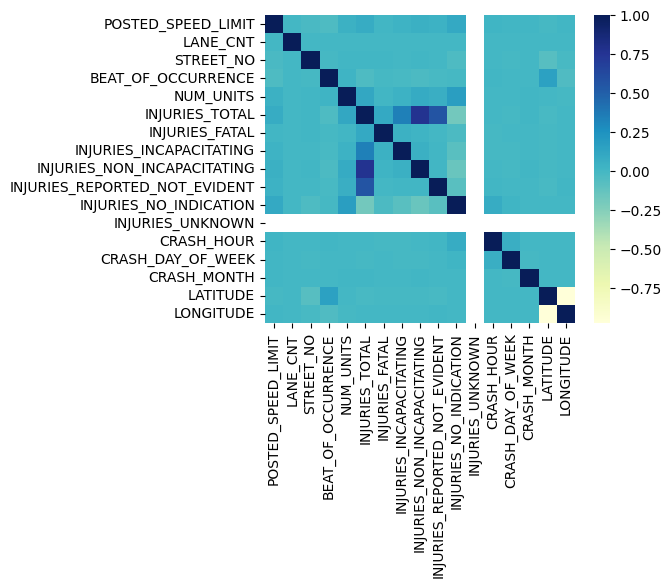

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(5, 4))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu")

# displaying heatmap
plt.show()

In [ ]:
df['INJURIES_UNKNOWN'].value_counts()

0.0    747104
Name: INJURIES_UNKNOWN, dtype: int64

In [ ]:
# Dropping the columns with huge number of missing values (5,00,000+)
new_df = df.drop(['CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'REPORT_TYPE'], axis=1)

In [ ]:
new_df.isna().sum()

CRASH_RECORD_ID                     0
RD_NO                            4329
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
TRAFFIC_CONTROL_DEVICE              0
DEVICE_CONDITION                    0
WEATHER_CONDITION                   0
LIGHTING_CONDITION                  0
FIRST_CRASH_TYPE                    0
TRAFFICWAY_TYPE                     0
ALIGNMENT                           0
ROADWAY_SURFACE_COND                0
ROAD_DEFECT                         0
CRASH_TYPE                          0
DAMAGE                              0
DATE_POLICE_NOTIFIED                0
PRIM_CONTRIBUTORY_CAUSE             0
SEC_CONTRIBUTORY_CAUSE              0
STREET_NO                           0
STREET_DIRECTION                    4
STREET_NAME                         1
BEAT_OF_OCCURRENCE                  5
NUM_UNITS                           0
MOST_SEVERE_INJURY               1632
INJURIES_TOTAL                   1621
INJURIES_FATAL                   1621
INJURIES_INC

In [ ]:
# Dropping injury related columns, as they just contain the number of injuries of each type in MOST_SEVERE_INJURY column
new_df = new_df.drop(['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'], axis = 1)

In [ ]:
# Unique value counts of each column
for i in new_df.columns:
  # if new_df[i].dtypes == 'object':
  print(new_df[i].value_counts())
  print('------------')

012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52ac71501da6110fbd95848a4f380e1b553f8dc03c70f782e85adb155ab97cbeabef83ba76d390c21f535    1
a90eb0b1d5f3ec080e1ae3f280d09561a00057667e0c3a83cce3e76e0ba10d0e39bf92d0a91bfa41c1426c67777a1ddfe72c09a63a527a19411423764d130e18    1
ab687659a9dbe9b3ec7c7e2c69403de395200c5c5fdfdeff7c16efb5ea36a4d6ff8ca574beb116cb0959bf8d8c6d2b47404ff59bc3225d62a8bb0e423e6697ff    1
aafebb7f04e03324ef6f50f54db33e27dcf8f4e97163f46d3f9e69586153b830b28df69e9a858c0093c0243fbb6e39cf3e544ad31a00529be08944700d1f3d2d    1
a67f3225d78b7d0c66cf99e392d966311a8ecdbc3da932ce6488e4451b1e871cba0c15b6c745b2fa1b4f1791d501226ca7e8cb203fc436821618ad8c8ff6b7e2    1
                                                                                                                                   ..
56fd9d81d66ecd6c87b2968d2f056ddebe18cf3ff7f1f1b4c3ad1acdb616fe4b05d92e3dca5fec9b6b7496342c0bc95acc202aad7393e042307406bbe6542487    1
52a5fddf62e7b506115df75bd12e71448e8f537f9648537b89a84c6b8a385d

In [ ]:
# Dropping CRASH_RECORD_ID and RD_NO (Report number) as they are unique for each record and don't help with the model.
# Also dropping CRASH_DATE and DATE_POLICE_NOTIFIED as they are mostly unique. Crash timing can be better estimated from the CRASH_HOUR AND CRASH_DAY_OF_WEEK columns
new_df = new_df.drop(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'DATE_POLICE_NOTIFIED'], axis = 1)

In [ ]:
new_df.isna().sum()

POSTED_SPEED_LIMIT            0
TRAFFIC_CONTROL_DEVICE        0
DEVICE_CONDITION              0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
TRAFFICWAY_TYPE               0
ALIGNMENT                     0
ROADWAY_SURFACE_COND          0
ROAD_DEFECT                   0
CRASH_TYPE                    0
DAMAGE                        0
PRIM_CONTRIBUTORY_CAUSE       0
SEC_CONTRIBUTORY_CAUSE        0
STREET_NO                     0
STREET_DIRECTION              4
STREET_NAME                   1
BEAT_OF_OCCURRENCE            5
NUM_UNITS                     0
MOST_SEVERE_INJURY         1632
CRASH_HOUR                    0
CRASH_DAY_OF_WEEK             0
CRASH_MONTH                   0
LATITUDE                   4926
LONGITUDE                  4926
LOCATION                   4926
dtype: int64

In [ ]:
# Dropping Latitude, Longitude and Location as street name is a better way to estimate the location
new_df = new_df.drop(['LATITUDE', 'LONGITUDE', 'LOCATION'], axis = 1)

In [ ]:
# Dropping a few more columns (street direction, no. and beat of occurrence arw different versions of street name, secondary contributing cause has many "unknown" values)
# Crash day and week are more precise categories than crash month which is broader
new_df = new_df.drop(['STREET_DIRECTION', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_MONTH'], axis = 1)

In [ ]:
new_df.isna().sum()

POSTED_SPEED_LIMIT            0
TRAFFIC_CONTROL_DEVICE        0
DEVICE_CONDITION              0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
TRAFFICWAY_TYPE               0
ALIGNMENT                     0
ROADWAY_SURFACE_COND          0
ROAD_DEFECT                   0
CRASH_TYPE                    0
DAMAGE                        0
PRIM_CONTRIBUTORY_CAUSE       0
STREET_NAME                   1
NUM_UNITS                     0
MOST_SEVERE_INJURY         1632
CRASH_HOUR                    0
CRASH_DAY_OF_WEEK             0
dtype: int64

In [ ]:
# Dropping the remaining na values as the dataset is large enough to not be affected by dropping these values
new_df = new_df.dropna()

In [ ]:
new_df.isna().sum()

POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
STREET_NAME                0
NUM_UNITS                  0
MOST_SEVERE_INJURY         0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747092 entries, 0 to 748724
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   POSTED_SPEED_LIMIT       747092 non-null  int64 
 1   TRAFFIC_CONTROL_DEVICE   747092 non-null  object
 2   DEVICE_CONDITION         747092 non-null  object
 3   WEATHER_CONDITION        747092 non-null  object
 4   LIGHTING_CONDITION       747092 non-null  object
 5   FIRST_CRASH_TYPE         747092 non-null  object
 6   TRAFFICWAY_TYPE          747092 non-null  object
 7   ALIGNMENT                747092 non-null  object
 8   ROADWAY_SURFACE_COND     747092 non-null  object
 9   ROAD_DEFECT              747092 non-null  object
 10  CRASH_TYPE               747092 non-null  object
 11  DAMAGE                   747092 non-null  object
 12  PRIM_CONTRIBUTORY_CAUSE  747092 non-null  object
 13  STREET_NAME              747092 non-null  object
 14  NUM_UNITS           

In [ ]:
new_df['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     645323
NONINCAPACITATING INJURY     57526
REPORTED, NOT EVIDENT        30659
INCAPACITATING INJURY        12772
FATAL                          812
Name: MOST_SEVERE_INJURY, dtype: int64

In [ ]:
# Changing the problem from multiclass to binary classification
new_df['INJURED'] = np.where(new_df['MOST_SEVERE_INJURY'] == 'NO INDICATION OF INJURY', 0, 1)

In [ ]:
new_df['INJURED'].value_counts()

0    645323
1    101769
Name: INJURED, dtype: int64

In [ ]:
new_df['POSTED_SPEED_LIMIT'].value_counts()

30    549651
35     50128
25     46966
20     31148
15     26417
10     17287
0       7302
40      7193
45      4911
5       4463
55       737
50       196
3        177
9         95
39        75
99        66
60        45
1         40
24        37
2         26
32        18
65        18
34        14
33        13
11        11
26         9
6          7
36         5
7          5
70         4
14         3
29         3
22         3
12         3
8          2
23         2
38         2
4          2
18         2
31         2
49         1
63         1
62         1
44         1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [ ]:
# Combining the multiple different speed limits into bins
new_df['SPEED_LIMIT'] = pd.cut(new_df['POSTED_SPEED_LIMIT'], bins=[0,10,20,30,40,50,60,70,80,90,100], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

In [ ]:
new_df['SPEED_LIMIT'].value_counts()

20-30     596671
10-20      57584
30-40      57450
0-10       22104
40-50       5109
50-60        782
90-100        66
60-70         24
70-80          0
80-90          0
Name: SPEED_LIMIT, dtype: int64

In [ ]:
# Separate copy of dataset for label encoding
fin_df = new_df.copy()

In [ ]:
fin_df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NAME,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,INJURED,SPEED_LIMIT
0,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,63RD ST,2,NO INDICATION OF INJURY,15,4,0,20-30
1,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,PULASKI RD,2,NO INDICATION OF INJURY,17,4,0,20-30
2,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,STONY ISLAND AVE,1,NO INDICATION OF INJURY,14,4,0,20-30
3,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,ASHLAND AVE,2,NO INDICATION OF INJURY,7,4,0,20-30
4,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,ELSTON AVE,2,NO INDICATION OF INJURY,18,4,0,20-30


In [ ]:
# Performing label encoding
le = preprocessing.LabelEncoder()

for cols in fin_df:
  if fin_df[cols].dtypes == 'object' or fin_df[cols].dtypes == 'category':
    fin_df[cols] = le.fit_transform(fin_df[cols])

In [ ]:
fin_df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NAME,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,INJURED,SPEED_LIMIT
0,30,4,3,2,3,17,8,3,5,1,1,2,24,190,2,2,15,4,0,2
1,30,4,3,2,3,10,8,3,0,1,1,1,19,1359,2,2,17,4,0,2
2,30,4,3,2,3,5,8,3,0,3,1,1,26,1488,1,2,14,4,0,2
3,30,16,6,5,3,10,8,3,5,5,1,1,19,306,2,2,7,4,0,2
4,30,4,3,2,3,10,8,3,6,1,1,2,19,626,2,2,18,4,0,2


In [ ]:
fin_df.dtypes

POSTED_SPEED_LIMIT         int64
TRAFFIC_CONTROL_DEVICE     int64
DEVICE_CONDITION           int64
WEATHER_CONDITION          int64
LIGHTING_CONDITION         int64
FIRST_CRASH_TYPE           int64
TRAFFICWAY_TYPE            int64
ALIGNMENT                  int64
ROADWAY_SURFACE_COND       int64
ROAD_DEFECT                int64
CRASH_TYPE                 int64
DAMAGE                     int64
PRIM_CONTRIBUTORY_CAUSE    int64
STREET_NAME                int64
NUM_UNITS                  int64
MOST_SEVERE_INJURY         int64
CRASH_HOUR                 int64
CRASH_DAY_OF_WEEK          int64
INJURED                    int64
SPEED_LIMIT                int64
dtype: object

# **VISUALIZATIONS**

In [ ]:
rel_labels = new_df['DAMAGE'].unique()
rel_count = []

for i in rel_labels:
  rel_count.append(new_df['DAMAGE'].value_counts()[i])

In [ ]:
rel_count

[457873, 202570, 86649]

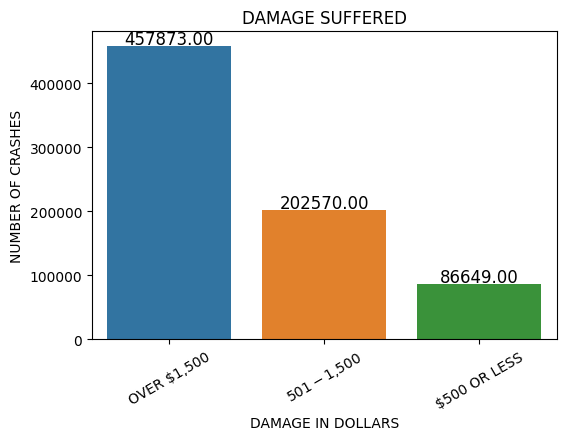

In [ ]:
plt.figure(figsize=(6, 4))
plots = sns.barplot(x = rel_labels, y = rel_count)

plt.xticks(rotation=30)

# Iterating over the bars one-by-one
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.xlabel('DAMAGE IN DOLLARS')
plt.ylabel('NUMBER OF CRASHES')
plt.title('DAMAGE SUFFERED')
plt.show()

In [ ]:
rel_labels = new_df['CRASH_DAY_OF_WEEK'].unique()
rel_count = []

for i in rel_labels:
  rel_count.append(new_df['CRASH_DAY_OF_WEEK'].value_counts()[i])

In [ ]:
rel_count

[105684, 121591, 107469, 106293, 110726, 92583, 102746]

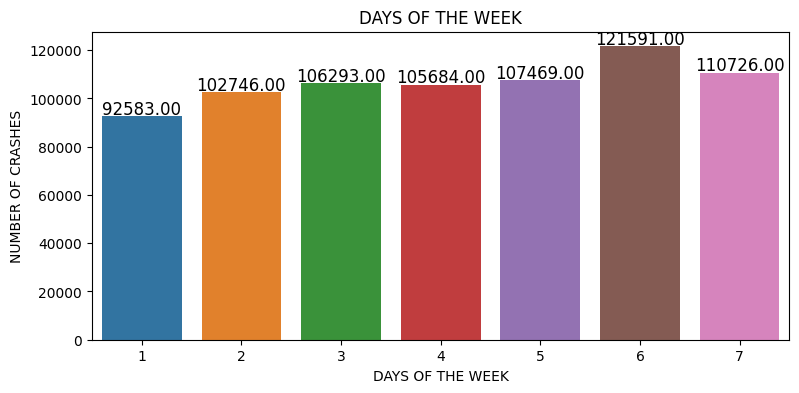

In [ ]:
plt.figure(figsize=(9, 4))
plots = sns.barplot(x = rel_labels, y = rel_count)

# plt.xticks(rotation=45)

# Iterating over the bars one-by-one
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.xlabel('DAYS OF THE WEEK')
plt.ylabel('NUMBER OF CRASHES')
plt.title('DAYS OF THE WEEK')
plt.show()

In [ ]:
rel_labels = new_df['CRASH_HOUR'].unique()
rel_count = []

for i in rel_labels:
  rel_count.append(new_df['CRASH_HOUR'].value_counts()[i])

In [ ]:
rel_count

[57504,
 55725,
 50277,
 31261,
 46050,
 34309,
 11810,
 38058,
 39166,
 44050,
 24497,
 45695,
 57167,
 34034,
 33871,
 13737,
 22473,
 16197,
 10213,
 19429,
 16104,
 27272,
 8605,
 9588]

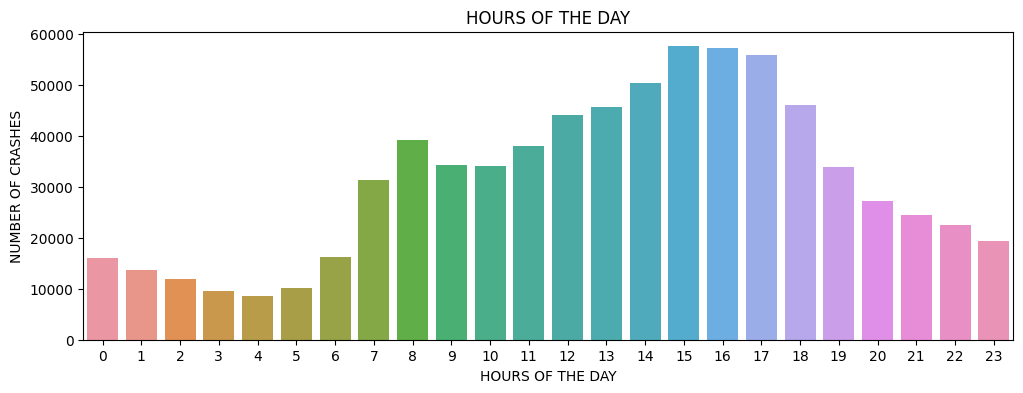

In [ ]:
plt.figure(figsize=(12, 4))
plots = sns.barplot(x = rel_labels, y = rel_count)

# plt.xticks(rotation=45)

# Iterating over the bars one-by-one
# for bar in plots.patches:
#     # Using Matplotlib's annotate function and
#     # passing the coordinates where the annotation shall be done
#     plots.annotate(format(bar.get_height(), '.2f'),
#                    (bar.get_x() + bar.get_width() / 2,
#                     bar.get_height()), ha='center', va='center',
#                    size=12, xytext=(0, 5),
#                    textcoords='offset points')

plt.xlabel('HOURS OF THE DAY')
plt.ylabel('NUMBER OF CRASHES')
plt.title('HOURS OF THE DAY')
plt.show()

In [ ]:
rel_labels = new_df['LIGHTING_CONDITION'].unique()
rel_count = []

for i in rel_labels:
  rel_count.append(new_df['LIGHTING_CONDITION'].value_counts()[i])

In [ ]:
rel_count

[481941, 163325, 32645, 35228, 12416, 21537]

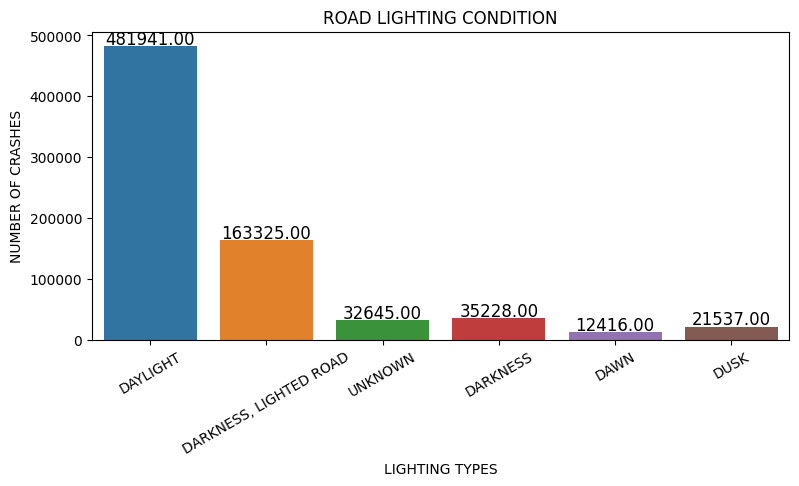

In [ ]:
plt.figure(figsize=(9, 4))
plots = sns.barplot(x = rel_labels, y = rel_count)

plt.xticks(rotation=30)

# Iterating over the bars one-by-one
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.xlabel('LIGHTING TYPES')
plt.ylabel('NUMBER OF CRASHES')
plt.title('ROAD LIGHTING CONDITION')
plt.show()

In [ ]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return '{:.1f}%\n({:d})'.format(pct, absolute)

In [ ]:
labels = ['INJURED','NOT INJURED']
count = [new_df['INJURED'].value_counts()[1],new_df['INJURED'].value_counts()[0]]

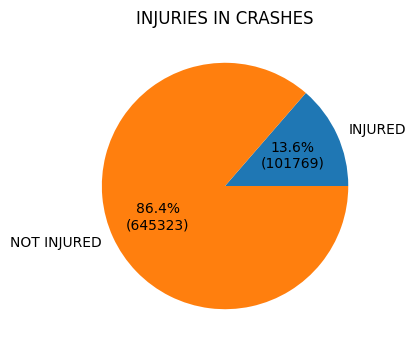

In [ ]:
# Creating plot
fig, ax = plt.subplots(figsize =(6, 4))
wedges, texts, autotexts = ax.pie(count,
                                  autopct = lambda pct: func(pct, count),
                                  labels = labels)

ax.set_title('INJURIES IN CRASHES')
plt.show()

In [ ]:
main_types = new_df['FIRST_CRASH_TYPE'].value_counts()['PARKED MOTOR VEHICLE'] + new_df['FIRST_CRASH_TYPE'].value_counts()['REAR END'] + new_df['FIRST_CRASH_TYPE'].value_counts()['SIDESWIPE SAME DIRECTION'] + new_df['FIRST_CRASH_TYPE'].value_counts()['TURNING']

labels = ['PARKED MOTOR VEHICLE','REAR ENDED','SIDESWIPE SAME DIRECTION','TURNING','OTHER']
count = [new_df['FIRST_CRASH_TYPE'].value_counts()['PARKED MOTOR VEHICLE'],
         new_df['FIRST_CRASH_TYPE'].value_counts()['REAR END'],
         new_df['FIRST_CRASH_TYPE'].value_counts()['SIDESWIPE SAME DIRECTION'],
         new_df['FIRST_CRASH_TYPE'].value_counts()['TURNING'],
         new_df['FIRST_CRASH_TYPE'].value_counts().sum() - main_types]

In [ ]:
main_types

563175

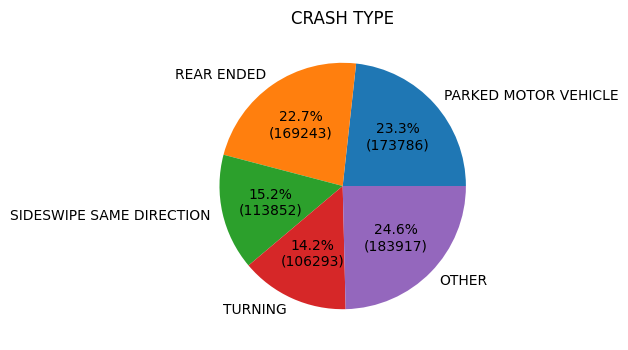

In [ ]:
# Creating plot
fig, ax = plt.subplots(figsize =(6, 4))
wedges, texts, autotexts = ax.pie(count,
                                  autopct = lambda pct: func(pct, count),
                                  labels = labels)

ax.set_title('CRASH TYPE')
plt.show()

# **DECISION TREE**

In [ ]:
X = fin_df.drop(['INJURED', 'MOST_SEVERE_INJURY', 'POSTED_SPEED_LIMIT'],axis='columns')
y = fin_df['INJURED']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [ ]:
param_dict = {'max_depth': range(1,10),
              'max_features': range(1,10),
              'criterion': ['gini', 'entropy']}

tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_dict, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 10)},
             verbose=True)

In [ ]:
clf_2 = grid_search.best_estimator_
clf_2

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=9,
                       random_state=1024)

In [ ]:
y_pred_grid_test = clf_2.predict(X_test)

In [ ]:
print('Model Testing Accuracy after pruning using GridSearchCV: ', format(accuracy_score(y_test, y_pred_grid_test)))

Model Testing Accuracy after pruning using GridSearchCV:  0.9116888563677898


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_grid_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    193597
           1       0.71      0.59      0.64     30531

    accuracy                           0.91    224128
   macro avg       0.83      0.77      0.80    224128
weighted avg       0.91      0.91      0.91    224128



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_grid_test)
cnf_matrix

array([[186465,   7132],
       [ 12661,  17870]])

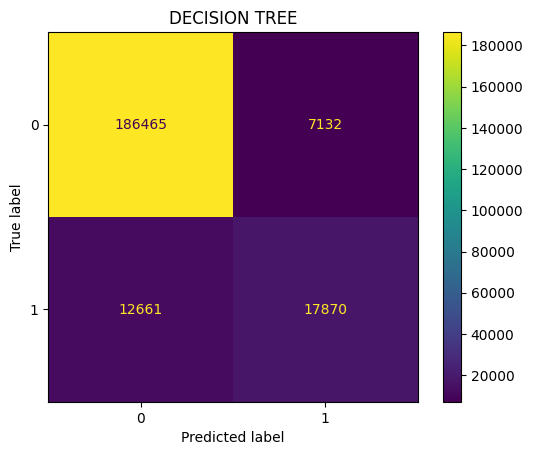

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=clf_2.classes_)

disp.plot()
plt.title('DECISION TREE')
plt.show()

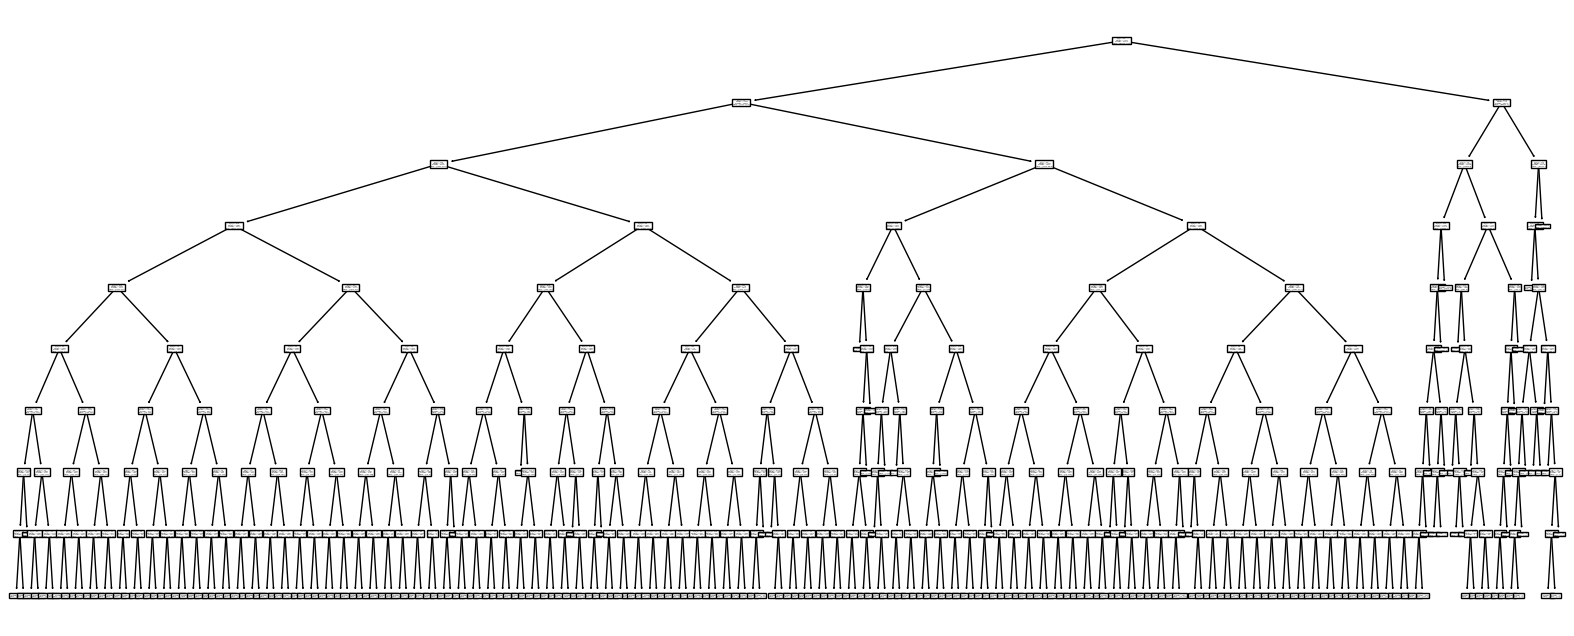

In [ ]:
plt.figure(figsize=(20,8))

tree.plot_tree(clf_2);

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[185403,   8194],
       [ 21470,   9061]])

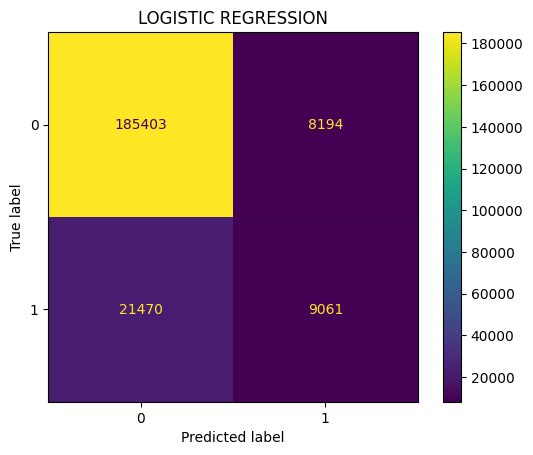

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logreg.classes_)
disp.plot()
plt.title('LOGISTIC REGRESSION')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93    193597
           1       0.53      0.30      0.38     30531

    accuracy                           0.87    224128
   macro avg       0.71      0.63      0.65    224128
weighted avg       0.85      0.87      0.85    224128



In [ ]:
print('Model Testing Accuracy: ', format(accuracy_score(y_test, y_pred)))

Model Testing Accuracy:  0.8676470588235294


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79d19d726f50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79d142085450>})

In [ ]:
fin_clf = rand_search.best_estimator_
fin_clf

RandomForestClassifier(max_depth=16, n_estimators=179)

In [ ]:
y_forest_pred = fin_clf.predict(X_test)

In [ ]:
print('Model Testing Accuracy using RandomizedSearchCV: ', format(accuracy_score(y_test, y_forest_pred)))

Model Testing Accuracy using RandomizedSearchCV:  0.9127998286693318


In [ ]:
class_report = classification_report(y_test, y_forest_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    193597
           1       0.70      0.63      0.66     30531

    accuracy                           0.91    224128
   macro avg       0.82      0.79      0.81    224128
weighted avg       0.91      0.91      0.91    224128



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_forest_pred)
cnf_matrix

array([[185450,   8147],
       [ 11397,  19134]])

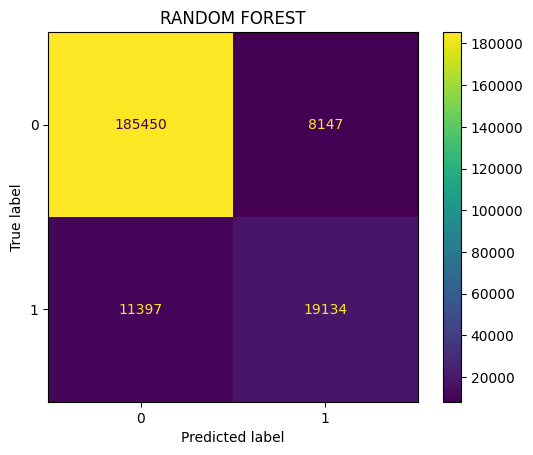

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=fin_clf.classes_)
disp.plot()
plt.title('RANDOM FOREST')
plt.show()

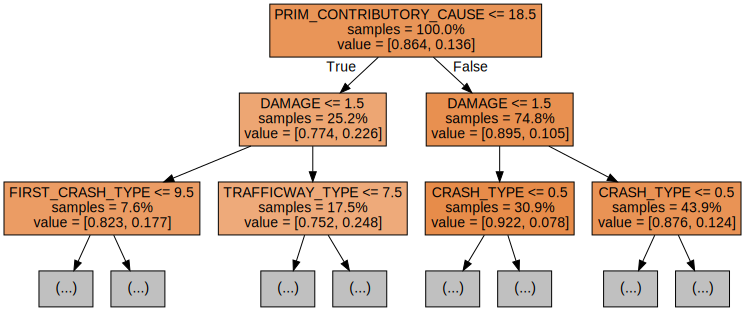

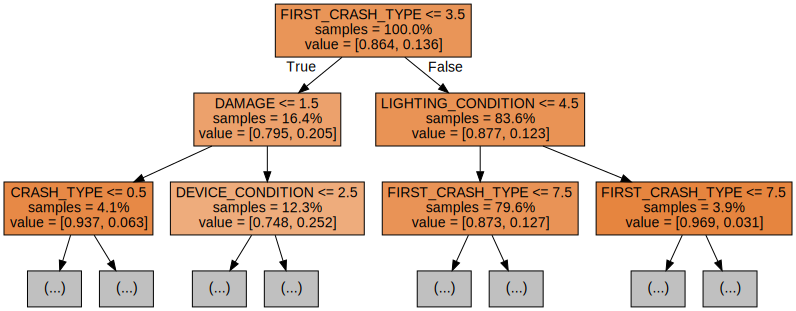

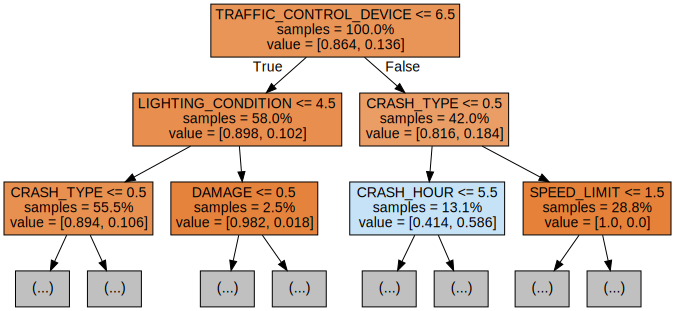

In [ ]:
# Visualizing first 3 trees upto depth 2
for i in range(3):
    tree = fin_clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)